In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,auc,roc_auc_score,f1_score,confusion_matrix,classification_report,roc_curve,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

import pickle
import warnings 
warnings.filterwarnings('ignore')

In [4]:
pip install xgboost

     -------------------------------------- 124.9/124.9 MB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from xgboost import XGBClassifier

In [6]:
data = pd.read_csv('D:/UdemyCourse ML/data.csv')
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [8]:
ds = data.copy()
ds.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


## EDA

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [12]:
ds.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [14]:
ds.isna().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

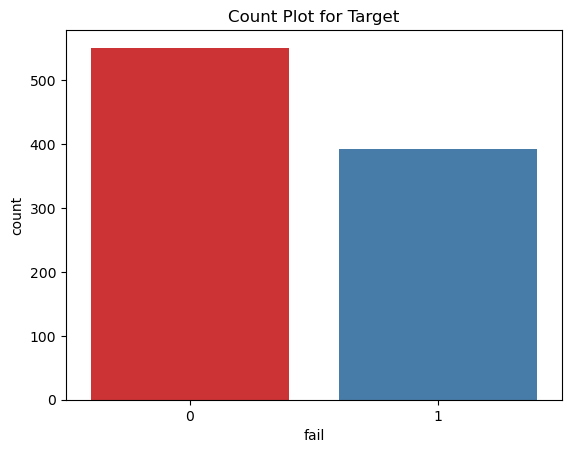

In [19]:
sns.countplot(data=ds,x='fail',palette='Set1')
plt.title("Count Plot for Target")
plt.show()

In [21]:
ds['fail'].value_counts()

0    551
1    393
Name: fail, dtype: int64

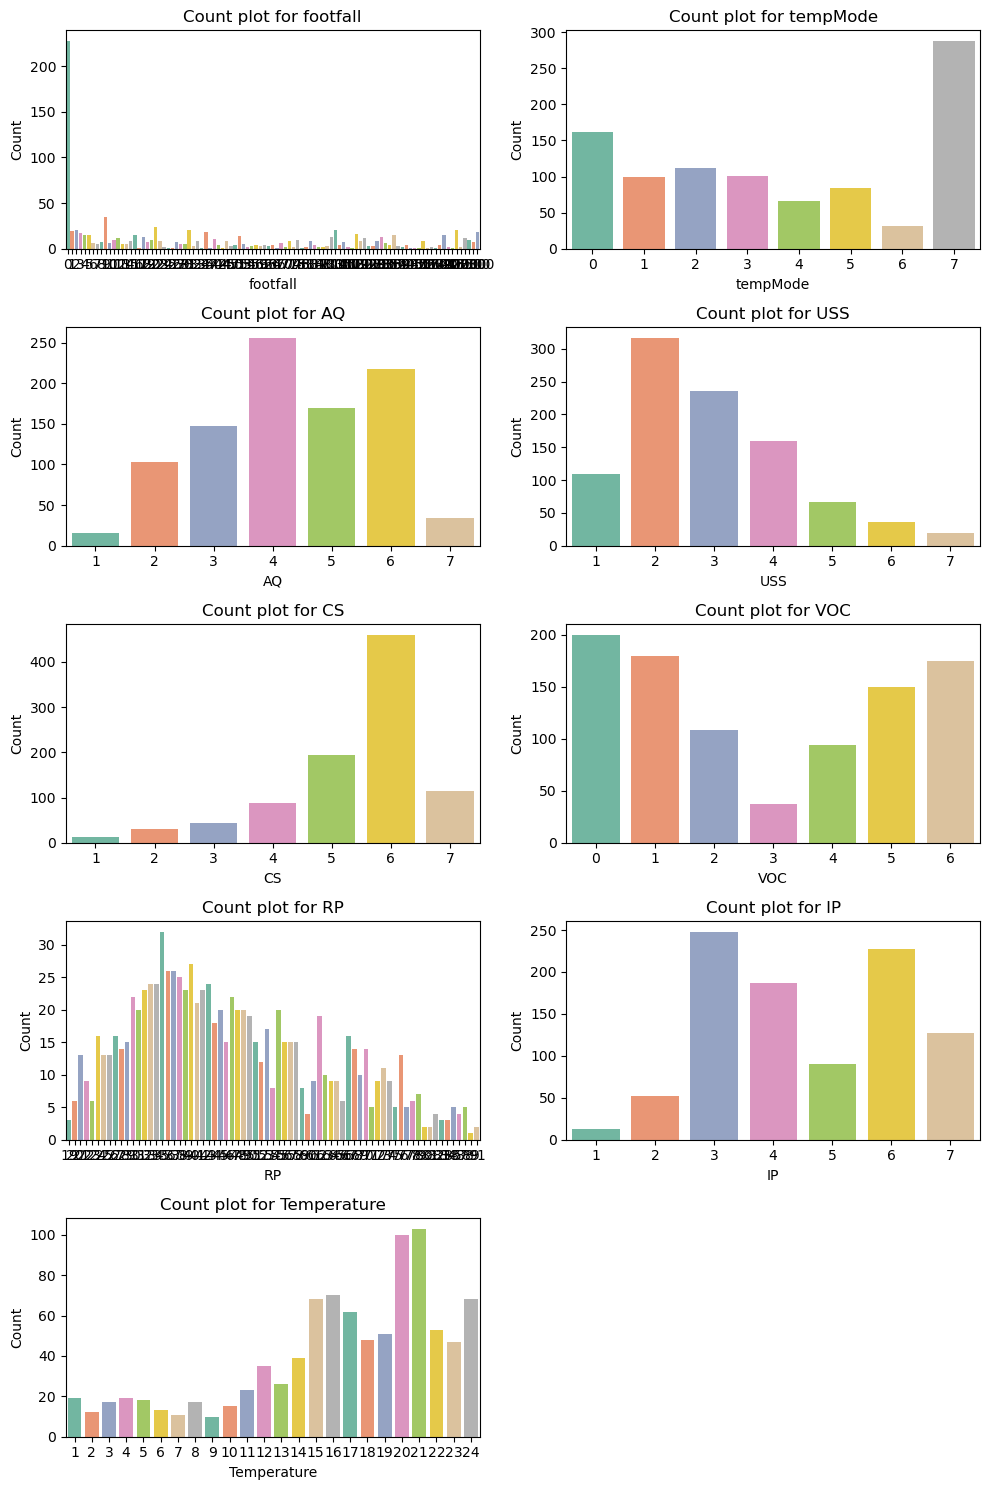

In [22]:
fig,axs = plt.subplots(5,2,figsize=(10,15))

for i, col in enumerate(ds.columns):
    if col != 'fail':
        sns.countplot(data=ds,x=ds[col],ax=axs[i//2,i%2],palette='Set2')
        axs[i//2,i%2].set_title(f'Count plot for {col}')
        axs[i//2,i%2].set_xlabel(col)
        axs[i//2,i%2].set_ylabel('Count')
        
if len(ds.columns)-1<10:
    fig.delaxes(axs[4,1])
plt.tight_layout()
plt.show()
        

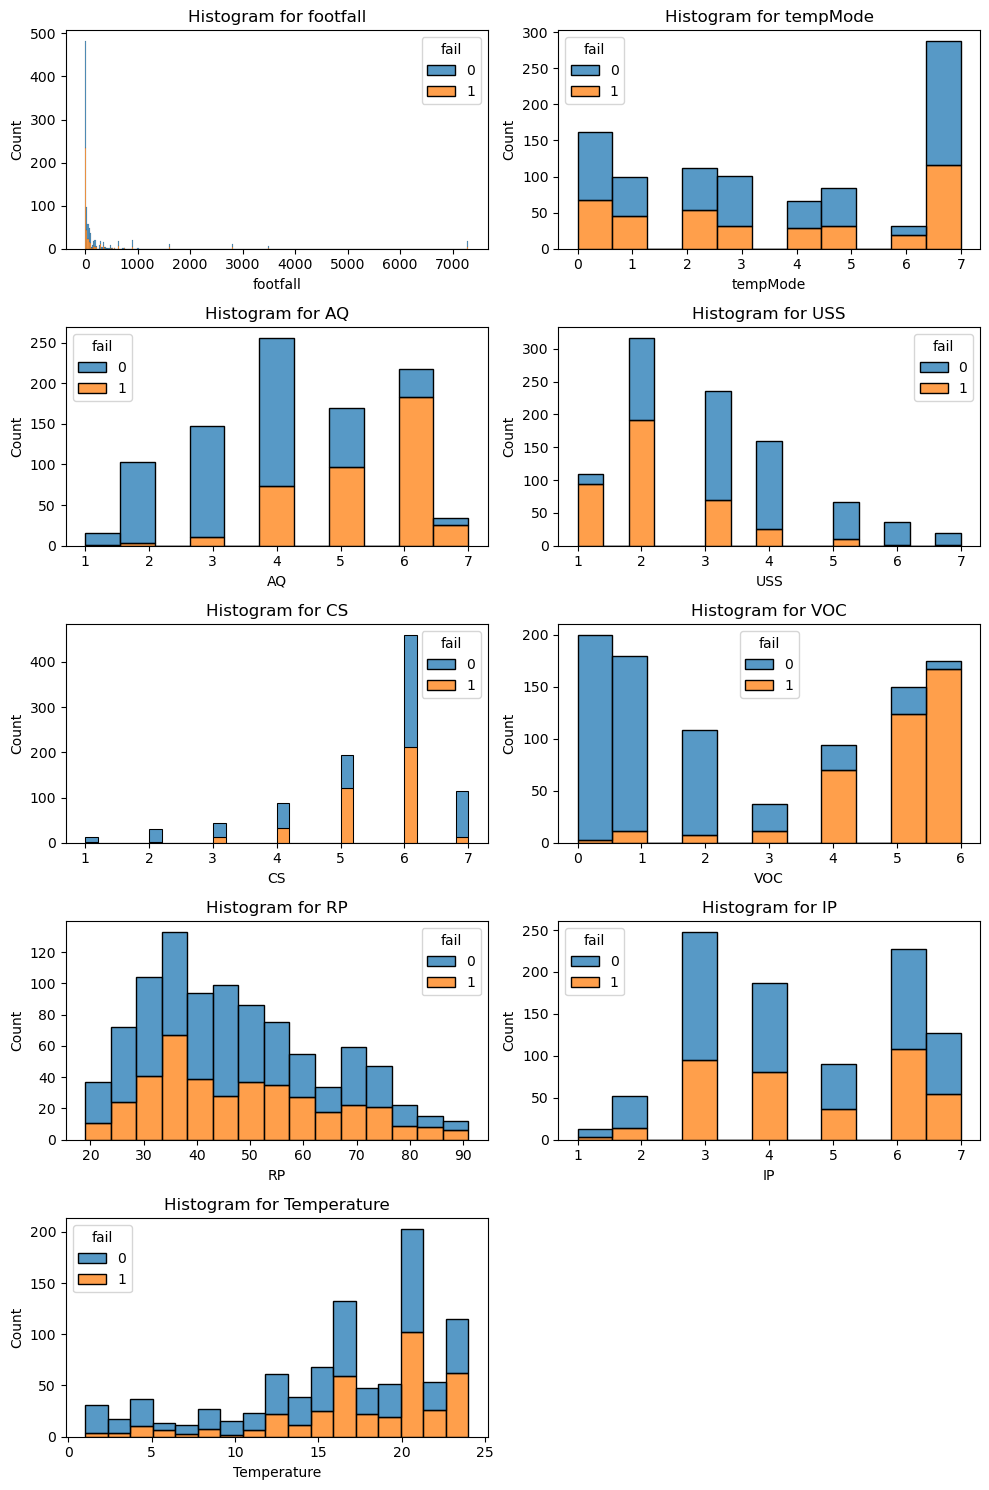

In [24]:
fig,axs=plt.subplots(5,2,figsize=(10,15))

for i,col in enumerate(ds.columns):
    if col!='fail':
        sns.histplot(data=ds,x=ds[col],ax=axs[i//2,i%2],hue=ds['fail'],multiple='stack')
        axs[i//2,i%2].set_title(f'Histogram for {col}')
        axs[i//2,i%2].set_xlabel(col)
        axs[i//2,i%2].set_ylabel('Count')
        #axs[i//2,i%2].tick_params(axis='x',rotation=90)
if len(ds.columns)-1<10:
      fig.delaxes(axs[4,1])
plt.tight_layout()
plt.show()

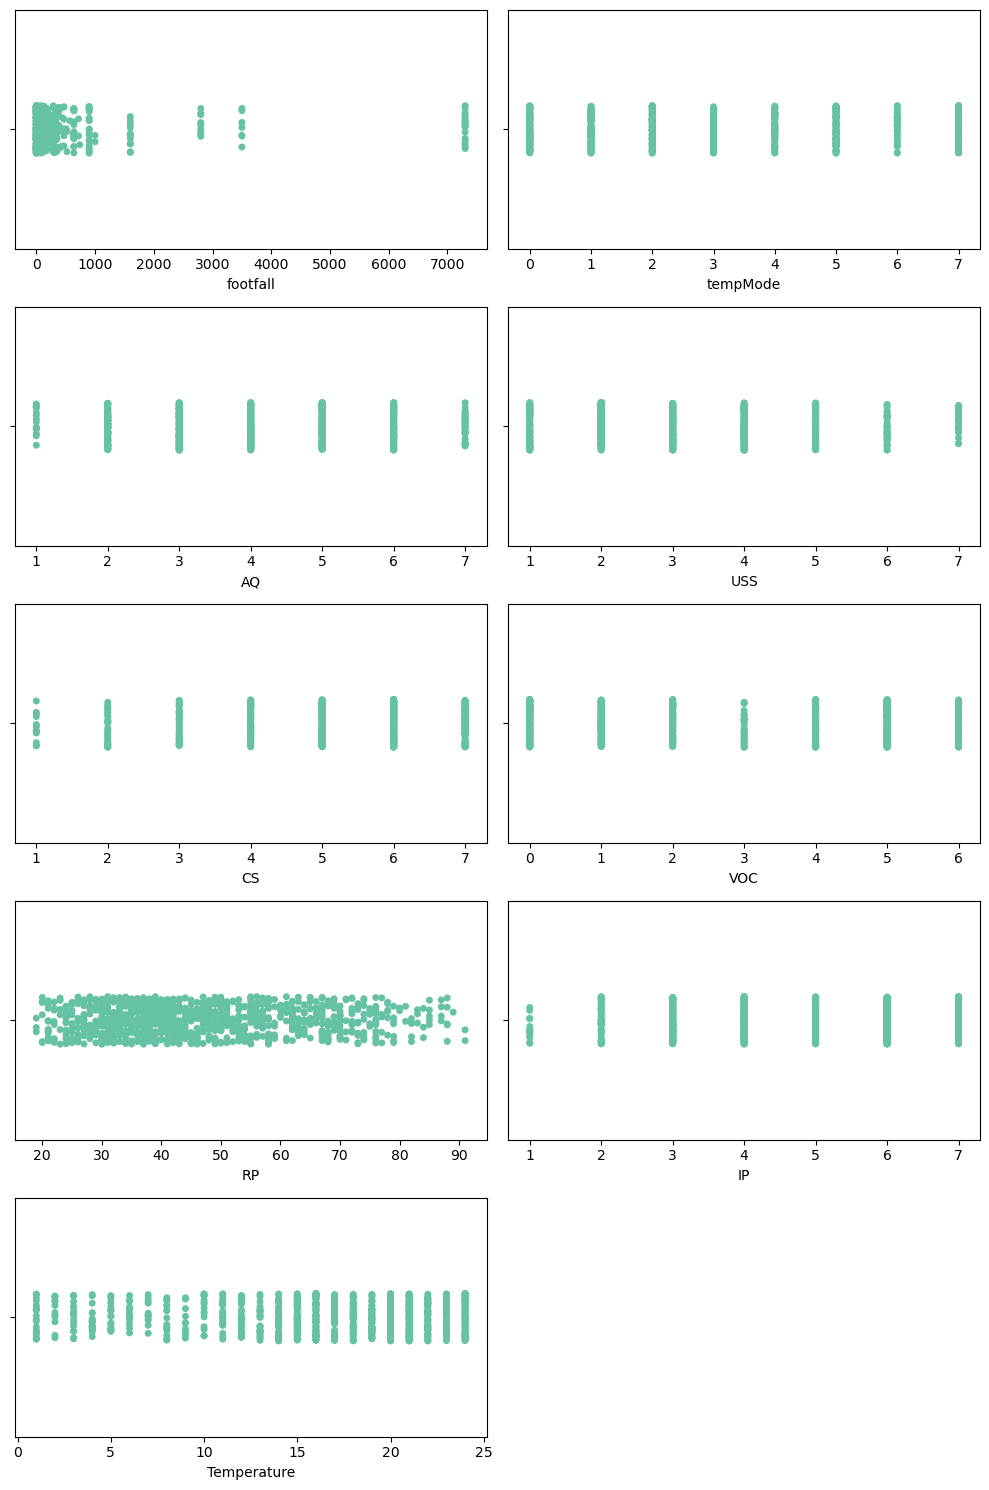

In [25]:
fig,axs=plt.subplots(5,2,figsize=(10,15))

for i,col in enumerate(ds.columns):
      if col!='fail':
        sns.stripplot(data=ds,x=ds[col],ax=axs[i//2,i%2],palette='Set2')
        #axs[i//2,i%2].set_title(f'{col}')
        axs[i//2,i%2].set_xlabel(col)
        #axs[i//2,i%2].set_ylabel('')
        #axs[i//2,i%2].tick_params(axis='x',rotation=90)
if len(ds.columns)-1<10:
      fig.delaxes(axs[4,1])
plt.tight_layout()
plt.show()

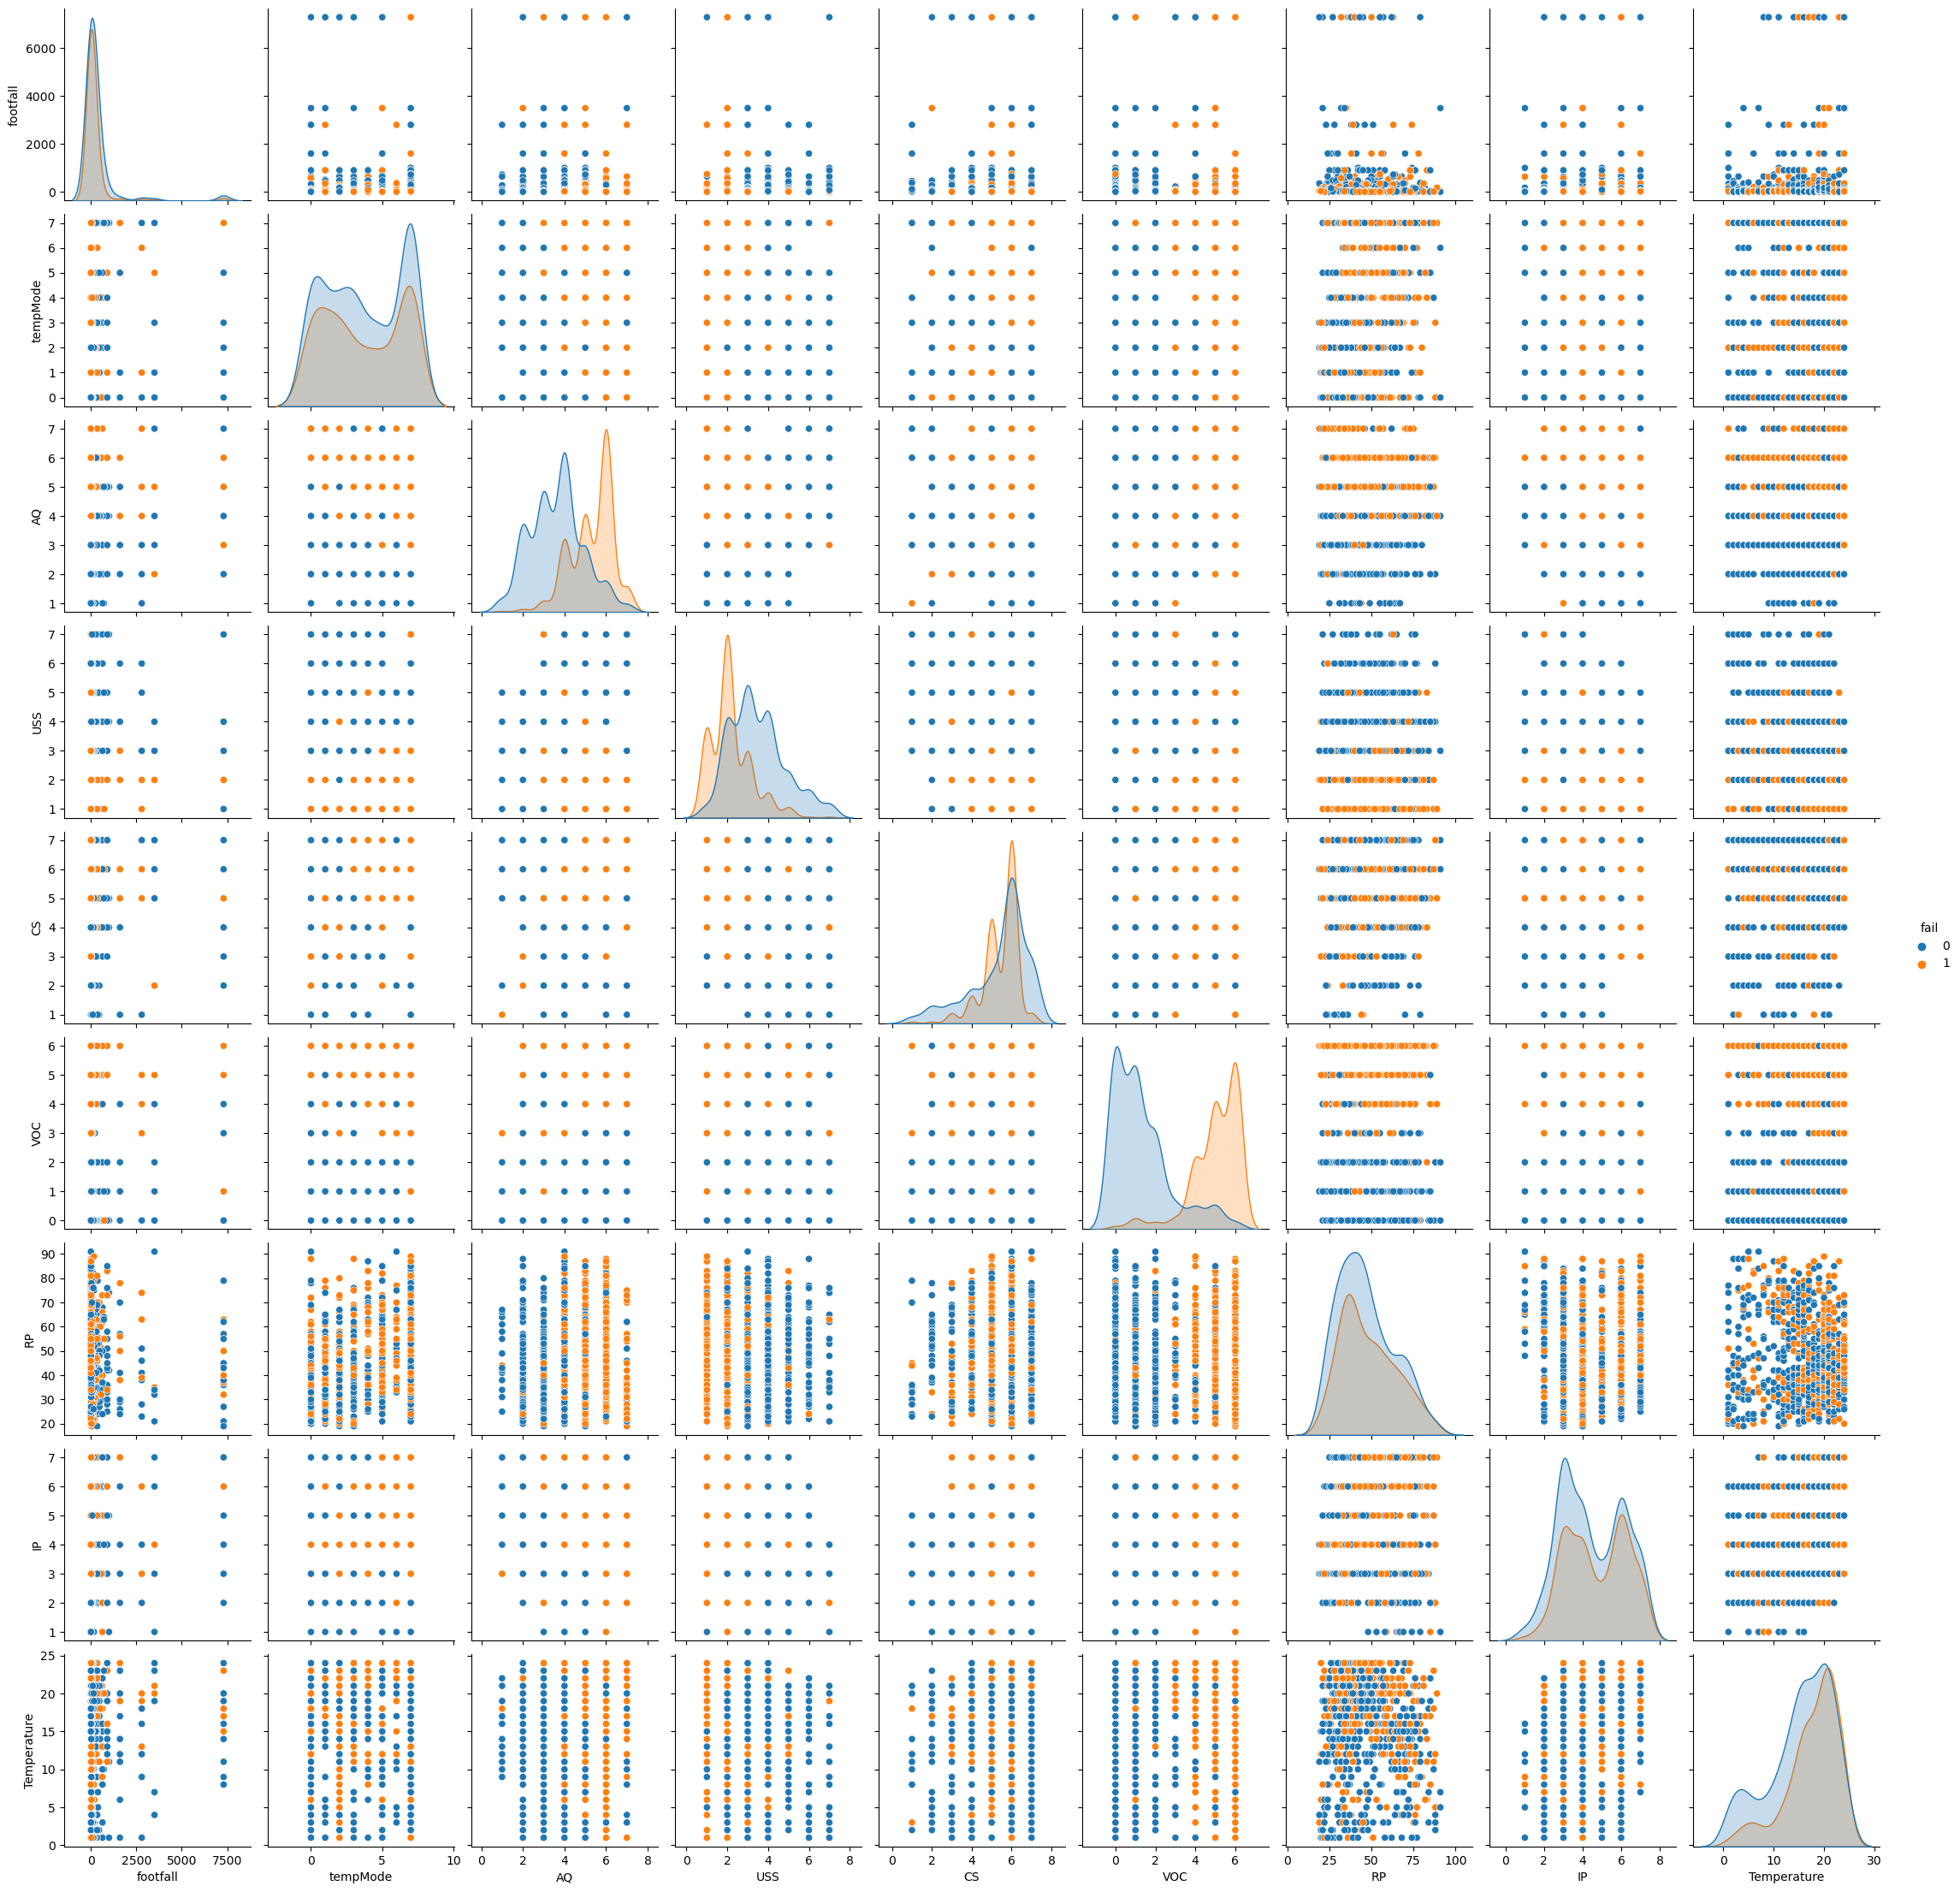

In [26]:
sns.pairplot(data=ds,hue='fail')
plt.show()

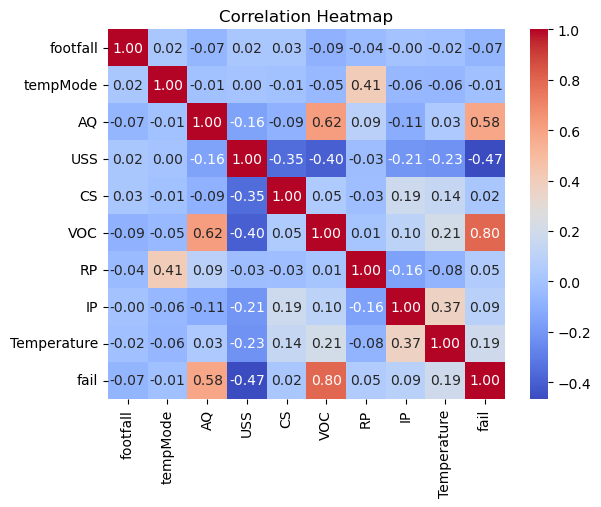

In [27]:
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Inference:

- .fail-VOC, positively correlated (0.80)
- .fail-AQ, positively correlated (0.58)
- .fail-Temperature, positively correlated (0.37)
- .fail-USS, negatively correlated (-0.47)


lower bound for footfall: -122.0
upper bound for footfall: 206.0
footfall has outliers 
 outliers: 
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
4         640         7   5    6   4    0  68   6            1     0
9        2800         0   3    3   7    0  39   3            1     0
10       1600         0   3    2   4    4  26   2            1     0
11        330         5   4    3   6    1  31   4            1     0
14       1000         7   5    7   4    0  74   1            1     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
906       900         0   3    4   7    2  30   5           24     0
920      3500         7   7    3   5    4  34   7           24     0
930      7300         7   3    3   5    1  40   7           24     1
934      1600         7   4    2   5    6  56   7           24     1
937      7300         1   2    3   6    0  43   7           24     0

[166 rows x 10 columns]


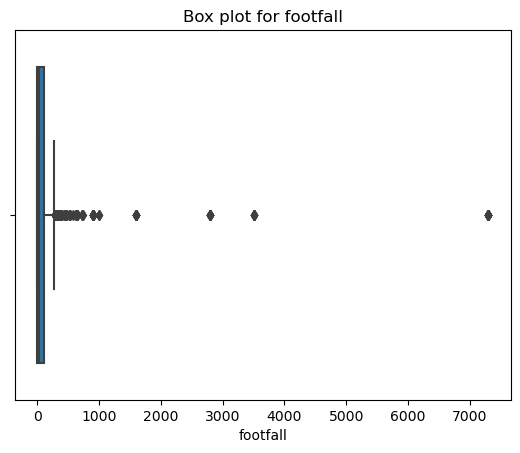

--------------------------------------------------
lower bound for tempMode: -8.0
upper bound for tempMode: 16.0
There is not outlier found for tempMode


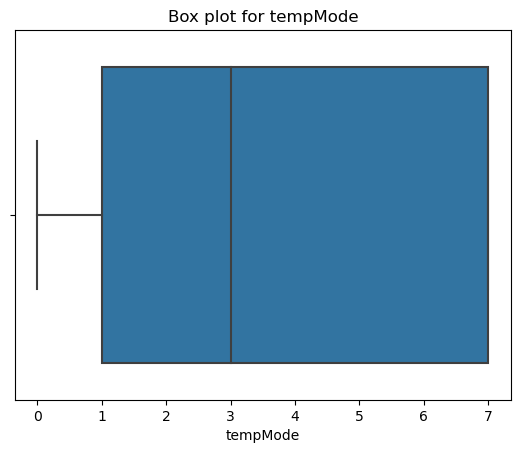

--------------------------------------------------
lower bound for AQ: 0.0
upper bound for AQ: 8.0
There is not outlier found for AQ


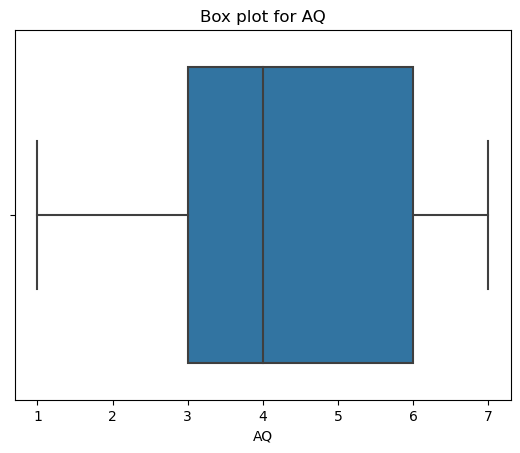

--------------------------------------------------
lower bound for USS: -1.0
upper bound for USS: 7.0
There is not outlier found for USS


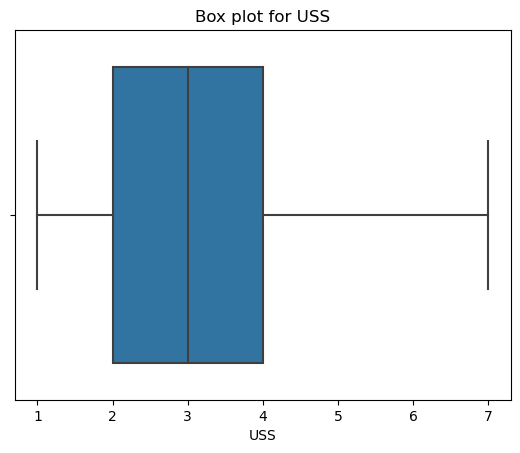

--------------------------------------------------
lower bound for CS: 3.5
upper bound for CS: 7.5
CS has outliers 
 outliers: 
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
8         180         7   4    6   3    3  31   4            1     0
22         12         3   4    6   3    2  27   3            2     0
24         19         0   4    2   2    1  45   3            2     0
29        450         3   4    7   1    0  34   3            2     0
31         64         3   4    4   2    1  60   2            3     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
774        27         1   3    5   3    5  25   5           21     0
775       110         1   6    5   1    1  33   3           21     0
776         0         7   4    6   3    0  45   3           22     0
828         3         7   2    4   3    6  33   6           22     1
829         9         7   4    4   2    2  44   3           23     0

[87 rows x 10 columns]


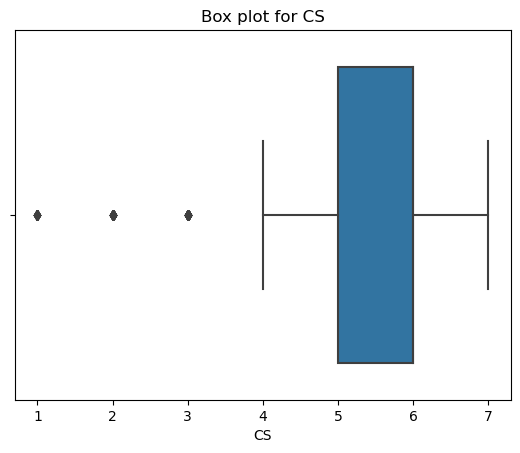

--------------------------------------------------
lower bound for VOC: -5.0
upper bound for VOC: 11.0
There is not outlier found for VOC


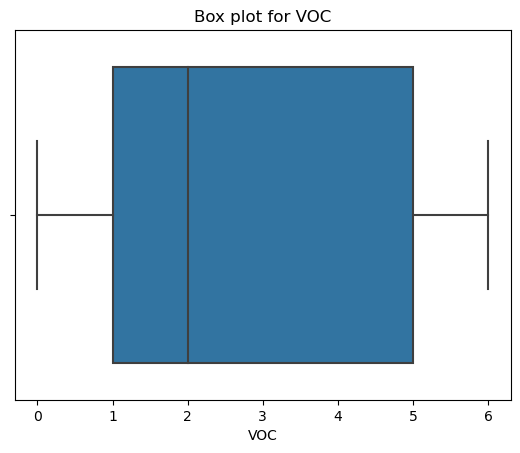

--------------------------------------------------
lower bound for RP: 1.0
upper bound for RP: 89.0
RP has outliers 
 outliers: 
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
82          0         6   4    3   6    2  91   1            5     0
105      3500         0   4    3   7    0  91   1            7     0


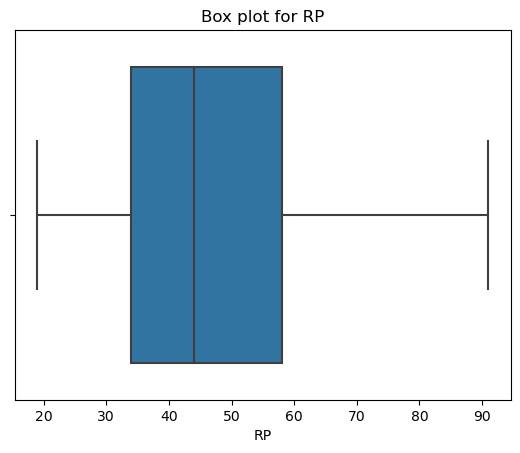

--------------------------------------------------
lower bound for IP: -1.5
upper bound for IP: 10.5
There is not outlier found for IP


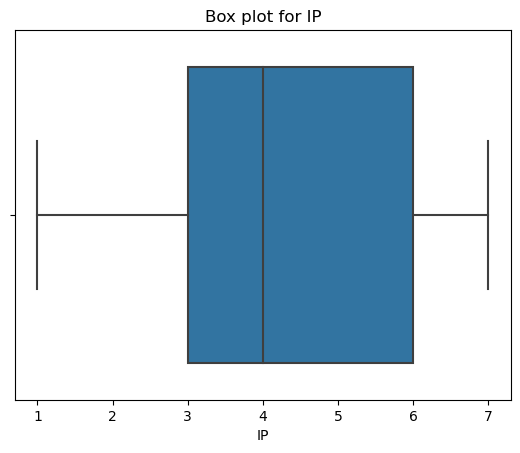

--------------------------------------------------
lower bound for Temperature: 3.5
upper bound for Temperature: 31.5
Temperature has outliers 
 outliers: 
    footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0          0         7   7    1   6    6  36   3            1     1
1        190         1   3    3   5    1  20   4            1     0
2         31         7   2    2   6    1  24   6            1     0
3         83         4   3    4   5    1  28   6            1     0
4        640         7   5    6   4    0  68   6            1     0
5        110         3   3    4   6    1  21   4            1     0
6        100         7   5    6   4    1  77   4            1     0
7         31         1   5    4   5    4  21   4            1     0
8        180         7   4    6   3    3  31   4            1     0
9       2800         0   3    3   7    0  39   3            1     0
10      1600         0   3    2   4    4  26   2            1     0
11       330         5   4  

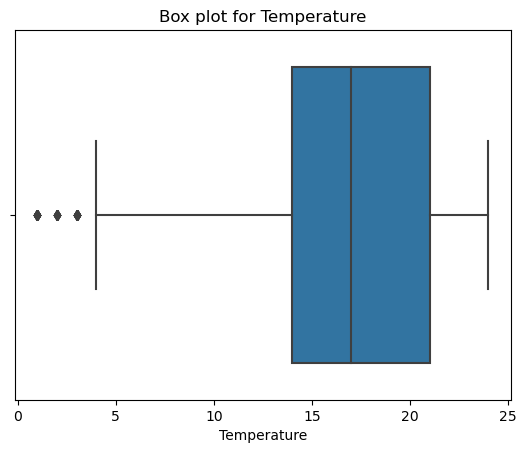

--------------------------------------------------


'Outliers are present in footfall, CS, RP, Temperature'

In [28]:
outlie = []
def outlier(ds):
    for i in ds.columns:
        if i=='fail':
            continue
        Q1 = ds[i].quantile(0.25)
        Q3 = ds[i].quantile(0.72)
        IQR = Q3-Q1
        
        
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        
        print(f'lower bound for {i}: {lower_bound}')
        print(f'upper bound for {i}: {upper_bound}')
        
        outliers=ds[(ds[i]<lower_bound) | (ds[i]>upper_bound)]
        if outliers.empty:
            print(f'There is not outlier found for {i}')
        else:
            print(f'{i} has outliers \n outliers: \n{outliers}')
            outlie.append(i)
        sns.boxplot(data=ds,x=ds[i])
        plt.title(f'Box plot for {i}')
        plt.show()
        print('-'*50)
    out = ', '.join(outlie)
    return f'Outliers are present in {out}'

outlier(ds)

## Data Preprocessing 

#### Handling outliers

- Feature Scaling

In [29]:
X = ds.drop('fail',axis=1)
y = ds['fail']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_train shape: (755, 9)
y_train shape: (755,)

X_test shape: (189, 9)
y_test shape: (189,)


In [30]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Model Building

In [32]:
models = {
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier()
    
}

In [33]:
def model_eval(true,pred):
    accuracy = accuracy_score(true,pred)
    roc_auc = roc_auc_score(true,pred)
    
    return accuracy,roc_auc

In [34]:
accuracy = []
rocauc = []
model_list = []
model_fitted = {}

def model_build(models, X_train, X_test, y_train, y_test):
    for i in range(len(models)):
        model_name = list(models.keys())[i]
        model = models[model_name]
        model_fit = model.fit(X_train, y_train)
        model_fitted[model_name] = model_fit
        
        # Train-set prediction
        train_pred = model.predict(X_train)
        
        # Test-set prediction
        test_pred = model.predict(X_test)
        
        # Model evaluation
        train_acc, train_roc = model_eval(y_train, train_pred)
        test_acc, test_roc = model_eval(y_test, test_pred)
        
        print(model_name)
        model_list.append(model_name)
        
        print('Model performance on train set')
        print(f'Accuracy score: {train_acc}')
        print(f'ROC AUC score: {train_roc}')
        
        print('-' * 30)
        
        print('Model performance on test set')
        print(f'Accuracy score: {test_acc}')
        print(f'ROC AUC score: {test_roc}')
        
        accuracy.append(test_acc)
        rocauc.append(test_roc)
        print('\n')


In [35]:
model_build(models,X_train,X_test,y_train,y_test)

SVC
Model performance on train set
Accuracy score: 0.9483443708609272
ROC AUC score: 0.9456417310799599
------------------------------
Model performance on test set
Accuracy score: 0.873015873015873
ROC AUC score: 0.8730561189993239


DecisionTreeClassifier
Model performance on train set
Accuracy score: 1.0
ROC AUC score: 1.0
------------------------------
Model performance on test set
Accuracy score: 0.798941798941799
ROC AUC score: 0.8002028397565923


RandomForestClassifier
Model performance on train set
Accuracy score: 1.0
ROC AUC score: 1.0
------------------------------
Model performance on test set
Accuracy score: 0.873015873015873
ROC AUC score: 0.8730561189993239


AdaBoostClassifier
Model performance on train set
Accuracy score: 0.9311258278145695
ROC AUC score: 0.9275223081066131
------------------------------
Model performance on test set
Accuracy score: 0.8783068783068783
ROC AUC score: 0.8796484110885734


GradientBoostClassifier
Model performance on train set
Accuracy sc

### Inference: Models are overfitting

In [38]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define models
models = {
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
}

# Define parameters for GridSearchCV
params = {
    "SVC": {
        'C': [1.0, 5.0, 10.0, 15.0, 30.0, 50.0],
        'kernel': ['rbf'],
        'gamma': [0.1, 0.2, 0.5, 0.8, 1.0],
    },
    "DecisionTreeClassifier": {
        'criterion': ['gini'],
        'max_depth': [3, 5, 10, 15, 20],
        'min_samples_split': [2, 4, 6, 8, 10],
        'min_samples_leaf': [1, 5, 10],
        'splitter': ['best', 'random'],
    },
    "RandomForestClassifier": {
        'n_estimators': [50, 100, 120, 150, 200],
        'criterion': ['gini'],
        'max_depth': [2, 3, 5, 8, 10, 20],
        'min_samples_split': [2, 4, 6, 7, 8, 9, 10],
    },
    "AdaBoostClassifier": {
        'n_estimators': [100, 200, 230, 250],
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
        'algorithm': ['SAMME.R'],
    },
    "GradientBoostingClassifier": {
        'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.8, 1.0],
        'n_estimators': [100, 200, 230, 250, 300],
        'max_depth': [3, 2, 5, 8, 10],
        'min_samples_split': [2, 3, 4, 8, 10, 12],
    },
    "XGBClassifier": {
        'learning_rate': [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
        'n_estimators': [120, 140, 180, 200],
        'max_depth': [1, 2, 3, 5, 8, 10, 15, 20],
        'gamma': [0.1, 0.2, 0.3, 0.5, 0.8],
        'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
    }
}

best_models = {}
models_prediction = {}
best_acc = []
best_roc = []

def model_tuned(models, params, X_train, X_test, y_train, y_test):
    for i in range(len(models)):
        model_name = list(models.keys())[i]
        model = models[model_name]
        param = params[model_name]

        gs = GridSearchCV(model, param, cv=5, scoring='roc_auc')
        gs.fit(X_train, y_train)

        best_models[model_name] = gs.best_estimator_
        print(f'Best parameters for {model_name} are: {gs.best_params_}')
        print(f'Model Score: {gs.best_score_}')

        test_pred = gs.best_estimator_.predict(X_test)
        test_acc, test_roc = model_eval(y_test, test_pred)

        models_prediction[model_name] = test_pred
        best_acc.append(test_acc)
        best_roc.append(test_roc)

        print(f'Accuracy: {test_acc}')
        print(f'ROC AUC: {test_roc}')
        print('-' * 30)
        print('\n')

model_tuned(models,params,X_train,X_test,y_train,y_test)

Best parameters for SVC are: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
Model Score: 0.970414678637425
Accuracy: 0.873015873015873
ROC AUC: 0.8730561189993239
------------------------------


Best parameters for DecisionTreeClassifier are: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 6, 'splitter': 'random'}
Model Score: 0.9611803463544708
Accuracy: 0.8624338624338624
ROC AUC: 0.8615618661257607
------------------------------


Best parameters for RandomForestClassifier are: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7, 'n_estimators': 150}
Model Score: 0.9711811848093109
Accuracy: 0.8783068783068783
ROC AUC: 0.8796484110885734
------------------------------


Best parameters for AdaBoostClassifier are: {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 200}
Model Score: 0.969594636793907
Accuracy: 0.8783068783068783
ROC AUC: 0.8804935767410412
------------------------------


Best parameters for GradientBoostingClassif

In [39]:
models_name=list(models.keys())
dt=pd.DataFrame({'Model':models_name,'Accuracy':best_acc,'ROC AUC':best_roc})
dt['ROC AUC']=dt['ROC AUC']*100
dt['Accuracy']=dt['Accuracy']*100
dt['ROC AUC']=dt['ROC AUC'].map('{:.2f}'.format)
dt['Accuracy']=dt['Accuracy'].map('{:.2f}'.format)
dt.sort_values(by='ROC AUC',ascending=False)

,Model,Accuracy,ROC AUC
5,XGBClassifier,88.36,88.54
3,AdaBoostClassifier,87.83,88.05
2,RandomForestClassifier,87.83,87.96
0,SVC,87.30,87.31
4,GradientBoostingClassifier,87.30,87.31
1,DecisionTreeClassifier,86.24,86.16


              precision    recall  f1-score   support

           0       0.91      0.86      0.88       102
           1       0.85      0.90      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



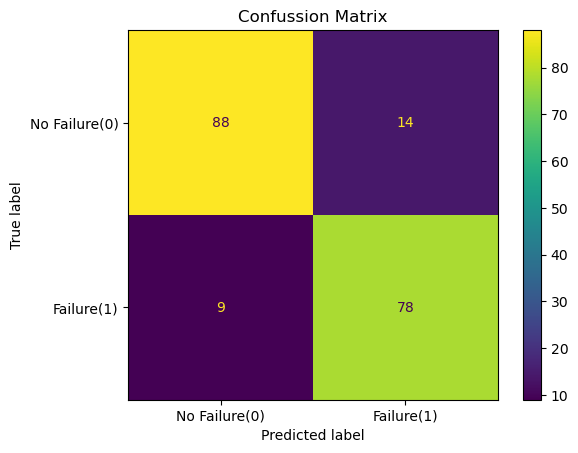

In [40]:
model=best_models['RandomForestClassifier']
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

mat=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Failure(0)','Failure(1)'])
mat.plot()
plt.title('Confussion Matrix')
plt.show()

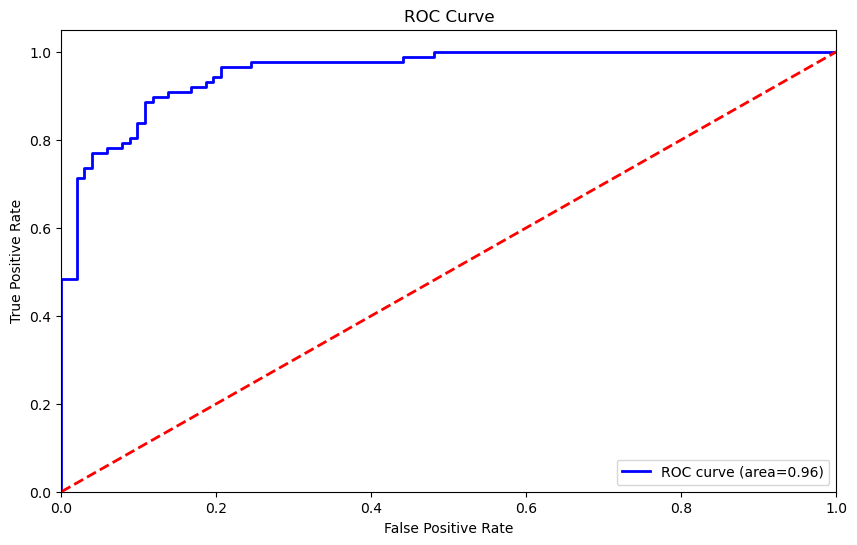

In [41]:
test_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,test_prob)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='blue',label=f'ROC curve (area={roc_auc:.2f})',lw=2)
plt.plot([0,1],[0,1],color='red',linestyle='--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()